In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/zacha/Desktop/tchdove2/Data science/car.csv")
print(data.head())

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/zacha/Desktop/tchdove2/Data science/car.csv'

In [ ]:
data.columns = ("sales", "maintainence", "doors","persons", "boot_space", "safety", "class")
data.head()

,sales,maintainence,doors,persons,boot_space,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
data.describe()

,sales,maintainence,doors,persons,boot_space,safety,class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sales         1727 non-null   object
 1   maintainence  1727 non-null   object
 2   doors         1727 non-null   object
 3   persons       1727 non-null   object
 4   boot_space    1727 non-null   object
 5   safety        1727 non-null   object
 6   class         1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
label_encoder = LabelEncoder()
data['sales'] = label_encoder.fit_transform(data['sales'])
data['maintainence'] = label_encoder.fit_transform(data['maintainence'])
data['doors'] = label_encoder.fit_transform(data['doors'])
data['persons'] = label_encoder.fit_transform(data['persons'])
data['boot_space'] = label_encoder.fit_transform(data['boot_space'])
data['safety'] = label_encoder.fit_transform(data['safety'])
data['class'] = label_encoder.fit_transform(data['class'])

In [ ]:
X = data[['sales','maintainence','doors','persons','boot_space','safety']]
Y = data['class']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 2)

In [ ]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
Y_pred = classifier.predict(X_test)

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        77
           1       0.92      0.80      0.86        15
           2       1.00      1.00      1.00       239
           3       1.00      1.00      1.00        15

    accuracy                           0.99       346
   macro avg       0.97      0.94      0.96       346
weighted avg       0.99      0.99      0.99       346



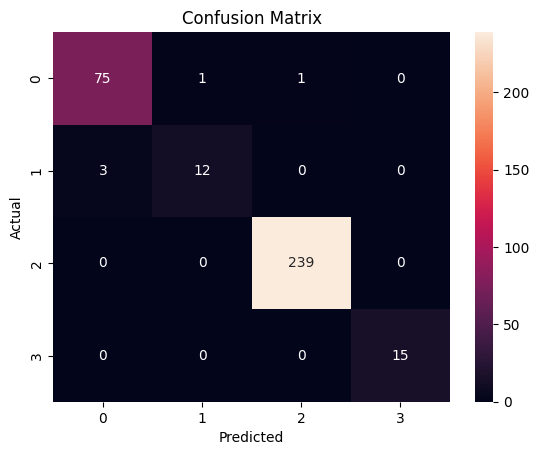

In [ ]:
matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(matrix, annot = True, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel('Actual')
plt.show()